In [9]:
import os


def warn(*args, **kwargs):
    pass


import warnings
from collections import OrderedDict

warnings.warn = warn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
folders = ['vm/new/3high-3low/0iid', 'vm/new/3high-3low/100iid',
           'vm/new/5high-5low/0iid', 'vm/new/5high-5low/100iid',
           'vm/new/10high-10low/0iid', 'vm/new/10high-10low/100iid',
           'vm/new/4high-2low/0iid', 'vm/new/4high-2low/100iid',
           'vm/new/8high-4low/0iid', 'vm/new/8high-4low/100iid',
           'vm/new/2high-4low/0iid', 'vm/new/2high-4low/100iid',
           'vm/new/4high-8low/0iid', 'vm/new/4high-8low/100iid',
           'vm/new/2high-8low/0iid', 'vm/new/2high-8low/100iid',
           'vm/same/3high-3low/0iid', 'vm/same/3high-3low/100iid',
           'vm/same/5high-5low/0iid', 'vm/same/5high-5low/100iid',
           'vm/same/10high-10low/0iid', 'vm/same/10high-10low/100iid',
           'vm/same/4high-2low/0iid', 'vm/same/4high-2low/100iid',
           'vm/same/8high-4low/0iid', 'vm/same/8high-4low/100iid',
           'vm/same/2high-4low/0iid', 'vm/same/2high-4low/100iid',
           'vm/same/4high-8low/0iid', 'vm/same/4high-8low/100iid',
           'vm/same/2high-8low/0iid', 'vm/same/2high-8low/100iid']

selected_confs = ['no-selector', 'random-selector', 'always-selector']
exp_data_selector: pd.DataFrame = pd.DataFrame()

for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        if exp_path.split('/')[-1].split('_')[0] not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['N. Clients'] = df.apply(lambda x: x['Client ID'].split('Client ')[1].split('\n')[0], axis=1)
            last_client = [int(x) for x in df['N. Clients'].unique()]
            df['High-Spec Clients'] = int(folder.split('/')[2].split('high-')[0])
            df['Low-Spec Clients'] = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df = df[df['Val F1'] >= 0]
            df['Previous Val F1'] = df.shift(1)['Val F1']
            df['Previous F1/Time'] = df.shift(1)['F1/Time']
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])
            df = df[df['FL Round'] > 1]

            # determines whether selector was activated for the round
            df['Selector'] = df['N. Clients'].apply(lambda n: int(n) != max(last_client))

            df = df[['Exp Name', 'N. Clients', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'Selector', 'Total Time of FL Round', 'Previous F1/Time', 'Previous Val F1', 'F1/Time', 'Val F1']]
            exp_data_selector = pd.concat([exp_data_selector, df])

print(exp_data_selector['Total Time of FL Round'].sum())

selected_confs = ['fixed-selector', 'tree-selector', 'bo-selector']
exp_data_selector_flip: pd.DataFrame = pd.DataFrame()

for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        if exp_path.split('/')[-1].split('_')[0] not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['N. Clients'] = df.apply(lambda x: x['Client ID'].split('Client ')[1].split('\n')[0], axis=1)
            last_client = [int(x) for x in df['N. Clients'].unique()]
            df['High-Spec Clients'] = int(folder.split('/')[2].split('high-')[0])
            df['Low-Spec Clients'] = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df = df[df['Val F1'] >= 0]
            df['Previous Val F1'] = df.shift(1)['Val F1']
            df['Previous F1/Time'] = df.shift(1)['F1/Time']
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])
            df = df[df['FL Round'] > 1]

            # determines whether selector was activated for the round
            df['Selector'] = df['N. Clients'].apply(lambda n: int(n) != max(last_client))

            df = df[['Exp Name', 'N. Clients', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'Selector', 'Total Time of FL Round', 'Previous F1/Time', 'Previous Val F1', 'F1/Time', 'Val F1']]
            exp_data_selector_flip = pd.concat([exp_data_selector_flip, df])

print(exp_data_selector_flip['Total Time of FL Round'].sum())


1431782.35
1340490.28


In [11]:
folders = ['vm/new/3high-3low/0iid',
           'vm/new/5high-5low/0iid',
           'vm/new/4high-2low/0iid',
           'vm/new/2high-4low/0iid',
           'vm/new/2high-8low/0iid',
           'vm/new/4high-8low/0iid',
           'vm/new/8high-4low/0iid',
           'vm/new/10high-10low/0iid',
           'vm/same/3high-3low/0iid',
           'vm/same/5high-5low/0iid',
           'vm/same/4high-2low/0iid',
           'vm/same/2high-4low/0iid',
           'vm/same/2high-8low/0iid',
           'vm/same/4high-8low/0iid',
           'vm/same/8high-4low/0iid',
           'vm/same/10high-10low/0iid']

selected_confs = ['no-hdh', 'random-hdh', 'always-hdh']
exp_data_hdh: pd.DataFrame = pd.DataFrame()


def shift_row(row, col_to_shift, shift_col, dataframe):
    return dataframe[col_to_shift].shift(row[shift_col])[row.name]


for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        exp_name = exp_path.split('/')[-1].split('_')[0]
        if exp_name not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['Client ID'] = df.apply(lambda x: int(x['Client ID'].split('Client ')[1].split('\n')[0]), axis=1)
            last_client = max([int(x) for x in df['Client ID'].unique()])
            high_spec_clients = int(folder.split('/')[2].split('high-')[0])
            low_spec_clients = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df['High-Spec Clients'] = high_spec_clients
            df['Low-Spec Clients'] = low_spec_clients
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])

            df['Previous JSD'] = df.shift(high_spec_clients + low_spec_clients)['JSD']

            df['HDH'] = df.apply(lambda x: x['HDH Time'] > 0.0, axis=1)
            df['shift_by'] = df.apply(lambda x: x['Client ID'] - last_client, axis=1)
            df['Filled F1/Time'] = df.apply(lambda row: shift_row(row, "F1/Time", "shift_by", df), axis=1)
            df['Filled F1'] = df.apply(lambda row: shift_row(row, "Val F1", "shift_by", df), axis=1)

            df['Previous Val F1'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1']
            df['Previous F1/Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1/Time']

            df['Final F1/Time'] = df["F1/Time"].iloc[-1]
            df['Final F1'] = df["Val F1"].iloc[-1]

            df = df[df['FL Round'] > 1]

            df = df[['Exp Name', 'Client ID', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'HDH', 'Total Time of FL Round', 'JSD', 'Previous JSD', 'F1/Time', 'Val F1',
                     'Previous Val F1', 'Previous F1/Time', 'HDH Time',
                     'Filled F1', 'Filled F1/Time', 'Final F1/Time', 'Final F1']]
            exp_data_hdh = pd.concat([exp_data_hdh, df])

print(exp_data_hdh['Total Time of FL Round'].sum())

selected_confs = ['fixed-hdh', 'tree-hdh', 'bo-hdh']
exp_data_hdh_flip: pd.DataFrame = pd.DataFrame()


def shift_row(row, col_to_shift, shift_col, dataframe):
    return dataframe[col_to_shift].shift(row[shift_col])[row.name]


for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        exp_name = exp_path.split('/')[-1].split('_')[0]
        if exp_name not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['Client ID'] = df.apply(lambda x: int(x['Client ID'].split('Client ')[1].split('\n')[0]), axis=1)
            last_client = max([int(x) for x in df['Client ID'].unique()])
            high_spec_clients = int(folder.split('/')[2].split('high-')[0])
            low_spec_clients = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df['High-Spec Clients'] = high_spec_clients
            df['Low-Spec Clients'] = low_spec_clients
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])

            df['Previous JSD'] = df.shift(high_spec_clients + low_spec_clients)['JSD']

            df['HDH'] = df.apply(lambda x: x['HDH Time'] > 0.0, axis=1)
            df['shift_by'] = df.apply(lambda x: x['Client ID'] - last_client, axis=1)
            df['Filled F1/Time'] = df.apply(lambda row: shift_row(row, "F1/Time", "shift_by", df), axis=1)
            df['Filled F1'] = df.apply(lambda row: shift_row(row, "Val F1", "shift_by", df), axis=1)

            df['Previous Val F1'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1']
            df['Previous F1/Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1/Time']

            df['Final F1/Time'] = df["F1/Time"].iloc[-1]
            df['Final F1'] = df["Val F1"].iloc[-1]

            df = df[df['FL Round'] > 1]

            df = df[['Exp Name', 'Client ID', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'HDH', 'Total Time of FL Round', 'JSD', 'Previous JSD', 'F1/Time', 'Val F1',
                     'Previous Val F1', 'Previous F1/Time', 'HDH Time',
                     'Filled F1', 'Filled F1/Time', 'Final F1/Time', 'Final F1']]
            exp_data_hdh_flip = pd.concat([exp_data_hdh_flip, df])

print(exp_data_hdh_flip['Total Time of FL Round'].sum())

741766.49
857317.53


In [12]:
folders = ['vm/same/2high-4low/0iid', 'vm/same/2high-4low/100iid',
           'vm/same/2high-8low/0iid', 'vm/same/2high-8low/100iid',
           'vm/same/3high-3low/0iid', 'vm/same/3high-3low/100iid',
           'vm/same/4high-2low/0iid', 'vm/same/4high-2low/100iid',
           'vm/same/4high-8low/0iid', 'vm/same/4high-8low/100iid',
           'vm/same/5high-5low/0iid', 'vm/same/5high-5low/100iid',
           'vm/same/8high-4low/0iid', 'vm/same/8high-4low/100iid',
           'vm/same/10high-10low/0iid', 'vm/same/10high-10low/100iid']

selected_confs = ['no-compressor', 'random-compressor', 'always-compressor', 'no-compressor-delay',
                  'random-compressor-delay', 'always-compressor-delay']
exp_data_compressor: pd.DataFrame = pd.DataFrame()


def shift_row(row, col_to_shift, shift_col, dataframe):
    return dataframe[col_to_shift].shift(row[shift_col])[row.name]


for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        exp_name = exp_path.split('/')[-1].split('_')[0]
        if exp_name not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['Client ID'] = df.apply(lambda x: int(x['Client ID'].split('Client ')[1].split('\n')[0]), axis=1)
            last_client = max([int(x) for x in df['Client ID'].unique()])
            high_spec_clients = int(folder.split('/')[2].split('high-')[0])
            low_spec_clients = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df['High-Spec Clients'] = high_spec_clients
            df['Low-Spec Clients'] = low_spec_clients
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])

            df['Compressor'] = exp_name.split('-')[0] == 'always'

            df['shift_by'] = df.apply(lambda x: x['Client ID'] - last_client, axis=1)
            df['Filled F1/Time'] = df.apply(lambda row: shift_row(row, "F1/Time", "shift_by", df), axis=1)
            df['Filled F1'] = df.apply(lambda row: shift_row(row, "Val F1", "shift_by", df), axis=1)
            df['Filled Total Time'] = df.apply(lambda row: shift_row(row, "Total Time of FL Round", "shift_by", df),
                                               axis=1)

            df['Previous Communication Time'] = df.shift(high_spec_clients + low_spec_clients)['Communication Time']
            df['Previous Val F1'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1']
            df['Previous Total Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled Total Time']
            df['Previous F1/Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1/Time']

            df['Final F1/Time'] = df["F1/Time"].iloc[-1]
            df['Final F1'] = df["Val F1"].iloc[-1]

            df = df[df['FL Round'] > 1]

            df = df[['Exp Name', 'Client ID', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'Total Time of FL Round', 'F1/Time', 'Previous Total Time', 'Compressor',
                     'Previous Communication Time', 'Filled Total Time',
                     'Communication Time', 'Filled F1/Time', 'Final F1/Time']]
            exp_data_compressor = pd.concat([exp_data_compressor, df])

print(exp_data_compressor['Total Time of FL Round'].sum())

selected_confs = ['fixed-compressor', 'tree-compressor', 'bo-compressor', 'fixed-compressor-delay',
                  'tree-compressor-delay', 'bo-compressor-delay']
exp_data_compressor_flip: pd.DataFrame = pd.DataFrame()


def shift_row(row, col_to_shift, shift_col, dataframe):
    return dataframe[col_to_shift].shift(row[shift_col])[row.name]


for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        exp_name = exp_path.split('/')[-1].split('_')[0]
        if exp_name not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['Client ID'] = df.apply(lambda x: int(x['Client ID'].split('Client ')[1].split('\n')[0]), axis=1)
            last_client = max([int(x) for x in df['Client ID'].unique()])
            high_spec_clients = int(folder.split('/')[2].split('high-')[0])
            low_spec_clients = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df['High-Spec Clients'] = high_spec_clients
            df['Low-Spec Clients'] = low_spec_clients
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])

            df['Compressor'] = exp_name.split('-')[0] == 'always'

            df['shift_by'] = df.apply(lambda x: x['Client ID'] - last_client, axis=1)
            df['Filled F1/Time'] = df.apply(lambda row: shift_row(row, "F1/Time", "shift_by", df), axis=1)
            df['Filled F1'] = df.apply(lambda row: shift_row(row, "Val F1", "shift_by", df), axis=1)
            df['Filled Total Time'] = df.apply(lambda row: shift_row(row, "Total Time of FL Round", "shift_by", df),
                                               axis=1)

            df['Previous Communication Time'] = df.shift(high_spec_clients + low_spec_clients)['Communication Time']
            df['Previous Val F1'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1']
            df['Previous Total Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled Total Time']
            df['Previous F1/Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1/Time']

            df['Final F1/Time'] = df["F1/Time"].iloc[-1]
            df['Final F1'] = df["Val F1"].iloc[-1]

            df = df[df['FL Round'] > 1]

            df = df[['Exp Name', 'Client ID', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'Total Time of FL Round', 'F1/Time', 'Previous Total Time', 'Compressor',
                     'Previous Communication Time', 'Filled Total Time',
                     'Communication Time', 'Filled F1/Time', 'Final F1/Time']]
            exp_data_compressor_flip = pd.concat([exp_data_compressor_flip, df])

print(exp_data_compressor_flip['Total Time of FL Round'].sum())

1437208.57
1123302.5000000002


15.577818836221638
306.5775795810015


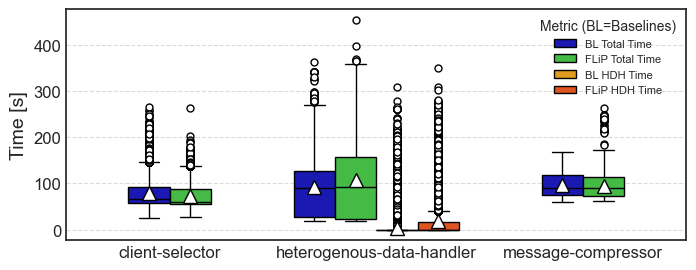

In [13]:
TIME_COL = 'Total Time of FL Round'
HDH_TIME_COL = 'HDH Time'

# --- 2. Prepare Tidy DataFrame (same as before) ---
all_data = []
all_data.append(
    pd.DataFrame(
        {'Time Value': exp_data_selector[TIME_COL], 'Pattern': 'client-selector', 'Measurement': 'BL Total Time'}))
all_data.append(pd.DataFrame(
    {'Time Value': exp_data_selector_flip[TIME_COL], 'Pattern': 'client-selector', 'Measurement': 'FLiP Total Time'}))
all_data.append(
    pd.DataFrame(
        {'Time Value': exp_data_hdh[TIME_COL], 'Pattern': 'heterogenous-data-handler', 'Measurement': 'BL Total Time'}))
all_data.append(
    pd.DataFrame({'Time Value': exp_data_hdh[HDH_TIME_COL], 'Pattern': 'heterogenous-data-handler',
                  'Measurement': 'BL HDH Time'}))
all_data.append(
    pd.DataFrame({'Time Value': exp_data_hdh_flip[TIME_COL], 'Pattern': 'heterogenous-data-handler',
                  'Measurement': 'FLiP Total Time'}))
all_data.append(
    pd.DataFrame({'Time Value': exp_data_hdh_flip[HDH_TIME_COL], 'Pattern': 'heterogenous-data-handler',
                  'Measurement': 'FLiP HDH Time'}))
all_data.append(pd.DataFrame(
    {'Time Value': exp_data_compressor[TIME_COL], 'Pattern': 'message-compressor', 'Measurement': 'BL Total Time'}))
all_data.append(pd.DataFrame(
    {'Time Value': exp_data_compressor_flip[TIME_COL], 'Pattern': 'message-compressor',
     'Measurement': 'FLiP Total Time'}))
combined_df = pd.concat(all_data, ignore_index=True)

hdh_total_time = \
    combined_df[
        (combined_df['Pattern'] == 'heterogenous-data-handler') & (combined_df['Measurement'] == 'BL Total Time')][
        'Time Value']
hdh_total_time_flip = combined_df[
    (combined_df['Pattern'] == 'heterogenous-data-handler') & (combined_df['Measurement'] == 'FLiP Total Time')][
    'Time Value']
percentage_increase = (hdh_total_time_flip.mean() - hdh_total_time.mean()) / hdh_total_time.mean() * 100
print(percentage_increase)

hdh_total_time = \
    combined_df[
        (combined_df['Pattern'] == 'heterogenous-data-handler') & (combined_df['Measurement'] == 'BL HDH Time')][
        'Time Value']
hdh_total_time_flip = combined_df[
    (combined_df['Pattern'] == 'heterogenous-data-handler') & (combined_df['Measurement'] == 'FLiP HDH Time')][
    'Time Value']
percentage_increase = (hdh_total_time_flip.mean() - hdh_total_time.mean()) / hdh_total_time.mean() * 100
print(percentage_increase)

# --- 3. Define Order and Colors ---
hue_order = ['BL Total Time', 'FLiP Total Time', 'BL HDH Time', 'FLiP HDH Time']
palette = {
    'BL Total Time': 'mediumblue',
    'FLiP Total Time': 'limegreen',
    'BL HDH Time': 'orange',
    'FLiP HDH Time': 'orangered'
}

# --- 4. Plotting with Manual Control ---
# Create the figure and axes first
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(8, 3))

# Filter data for the 2-box groups
df_1_box = combined_df[combined_df['Pattern'] == 'client-selector']
# Filter data for the 4-box group
df_2_box = combined_df[combined_df['Pattern'] == 'heterogenous-data-handler']
# Filter data for the 4-box group
df_3_box = combined_df[combined_df['Pattern'] == 'message-compressor']

# --- NEW: Define the plot style elements in a dictionary ---
# This makes it easy to apply a consistent style to all boxplots.
style_args = {
    'showmeans': True,  # This is crucial to display the mean marker
    'boxprops': {'edgecolor': 'black', 'linewidth': 1},
    'whiskerprops': {'color': 'black', 'linewidth': 1},
    'capprops': {'color': 'black', 'linewidth': 1},
    'medianprops': {'color': 'black', 'linewidth': 1},
    'flierprops': {'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black',
                   'markersize': 5, 'markeredgewidth': 1},
    'meanprops': {'marker': '^', 'markerfacecolor': 'white', 'markeredgecolor': 'black',
                  'markersize': 10, 'markeredgewidth': 1}
}

sns.set_style("white")

sns.boxplot(
    data=df_1_box,
    x='Pattern',
    y='Time Value',
    hue='Measurement',
    hue_order=['BL Total Time', 'FLiP Total Time'],  # Only use relevant hue order
    palette=palette,
    width=0.4,
    ax=ax,
    **style_args
)

sns.boxplot(
    data=df_2_box,
    x='Pattern',
    y='Time Value',
    hue='Measurement',
    hue_order=hue_order,  # Only use relevant hue order
    palette=palette,
    ax=ax,
    **style_args
)

sns.boxplot(
    data=df_3_box,
    x='Pattern',
    y='Time Value',
    hue='Measurement',
    hue_order=['BL Total Time', 'FLiP Total Time'],  # Use the full hue order here
    palette=palette,
    width=0.4,
    ax=ax,
    **style_args
)

# --- 5. Final Polishing ---
# Set the x-axis labels correctly
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Time [s]', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.tick_params(axis='both', which='major', labelsize=12)

# Handle the legend (it will have duplicates, so we fix it)
handles, labels = ax.get_legend_handles_labels()
# Use OrderedDict to preserve order and remove duplicates
unique_labels = OrderedDict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title='Metric (BL=Baselines)', fontsize=8)

plt.savefig('plots/rq3/rq3_time_boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
folders = ['vm/new/3high-3low/0iid', 'vm/new/3high-3low/100iid',
           'vm/new/5high-5low/0iid', 'vm/new/5high-5low/100iid',
           'vm/new/10high-10low/0iid', 'vm/new/10high-10low/100iid',
           'vm/new/4high-2low/0iid', 'vm/new/4high-2low/100iid',
           'vm/new/8high-4low/0iid', 'vm/new/8high-4low/100iid',
           'vm/new/2high-4low/0iid', 'vm/new/2high-4low/100iid',
           'vm/new/4high-8low/0iid', 'vm/new/4high-8low/100iid',
           'vm/new/2high-8low/0iid', 'vm/new/2high-8low/100iid',
           'vm/same/3high-3low/0iid', 'vm/same/3high-3low/100iid',
           'vm/same/5high-5low/0iid', 'vm/same/5high-5low/100iid',
           'vm/same/10high-10low/0iid', 'vm/same/10high-10low/100iid',
           'vm/same/4high-2low/0iid', 'vm/same/4high-2low/100iid',
           'vm/same/8high-4low/0iid', 'vm/same/8high-4low/100iid',
           'vm/same/2high-4low/0iid', 'vm/same/2high-4low/100iid',
           'vm/same/4high-8low/0iid', 'vm/same/4high-8low/100iid',
           'vm/same/2high-8low/0iid', 'vm/same/2high-8low/100iid']

selected_confs = ['no-selector-text', 'random-selector-text', 'always-selector-text']
exp_data_selector: pd.DataFrame = pd.DataFrame()

for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        if exp_path.split('/')[-1].split('_')[0] not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['N. Clients'] = df.apply(lambda x: x['Client ID'].split('Client ')[1].split('\n')[0], axis=1)
            last_client = [int(x) for x in df['N. Clients'].unique()]
            df['High-Spec Clients'] = int(folder.split('/')[2].split('high-')[0])
            df['Low-Spec Clients'] = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df = df[df['Val F1'] >= 0]
            df['Previous Val F1'] = df.shift(1)['Val F1']
            df['Previous F1/Time'] = df.shift(1)['F1/Time']
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])
            df = df[df['FL Round'] > 1]

            # determines whether selector was activated for the round
            df['Selector'] = df['N. Clients'].apply(lambda n: int(n) != max(last_client))

            df = df[['Exp Name', 'N. Clients', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'Selector', 'Total Time of FL Round', 'Previous F1/Time', 'Previous Val F1', 'F1/Time', 'Val F1']]
            exp_data_selector = pd.concat([exp_data_selector, df])

print(exp_data_selector['Total Time of FL Round'].sum())

selected_confs = ['fixed-selector-text', 'tree-selector-text', 'bo-selector-text']
exp_data_selector_flip: pd.DataFrame = pd.DataFrame()

for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        if exp_path.split('/')[-1].split('_')[0] not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['N. Clients'] = df.apply(lambda x: x['Client ID'].split('Client ')[1].split('\n')[0], axis=1)
            last_client = [int(x) for x in df['N. Clients'].unique()]
            df['High-Spec Clients'] = int(folder.split('/')[2].split('high-')[0])
            df['Low-Spec Clients'] = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df = df[df['Val F1'] >= 0]
            df['Previous Val F1'] = df.shift(1)['Val F1']
            df['Previous F1/Time'] = df.shift(1)['F1/Time']
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])
            df = df[df['FL Round'] > 1]

            # determines whether selector was activated for the round
            df['Selector'] = df['N. Clients'].apply(lambda n: int(n) != max(last_client))

            df = df[['Exp Name', 'N. Clients', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'Selector', 'Total Time of FL Round', 'Previous F1/Time', 'Previous Val F1', 'F1/Time', 'Val F1']]
            exp_data_selector_flip = pd.concat([exp_data_selector_flip, df])

print(exp_data_selector_flip['Total Time of FL Round'].sum())


289408.54
278753.56


In [15]:
folders = ['vm/new/3high-3low/0iid',
           'vm/new/5high-5low/0iid',
           'vm/new/4high-2low/0iid',
           'vm/new/2high-4low/0iid',
           'vm/new/2high-8low/0iid',
           'vm/new/4high-8low/0iid',
           'vm/new/8high-4low/0iid',
           'vm/new/10high-10low/0iid',
           'vm/same/3high-3low/0iid',
           'vm/same/5high-5low/0iid',
           'vm/same/4high-2low/0iid',
           'vm/same/2high-4low/0iid',
           'vm/same/2high-8low/0iid',
           'vm/same/4high-8low/0iid',
           'vm/same/8high-4low/0iid',
           'vm/same/10high-10low/0iid']

selected_confs = ['no-hdh-text', 'random-hdh-text', 'always-hdh-text']
exp_data_hdh: pd.DataFrame = pd.DataFrame()


def shift_row(row, col_to_shift, shift_col, dataframe):
    return dataframe[col_to_shift].shift(row[shift_col])[row.name]


for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        exp_name = exp_path.split('/')[-1].split('_')[0]
        if exp_name not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['Client ID'] = df.apply(lambda x: int(x['Client ID'].split('Client ')[1].split('\n')[0]), axis=1)
            last_client = max([int(x) for x in df['Client ID'].unique()])
            high_spec_clients = int(folder.split('/')[2].split('high-')[0])
            low_spec_clients = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df['High-Spec Clients'] = high_spec_clients
            df['Low-Spec Clients'] = low_spec_clients
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])

            df['Previous JSD'] = df.shift(high_spec_clients + low_spec_clients)['JSD']

            df['HDH'] = df.apply(lambda x: x['HDH Time'] > 0.0, axis=1)
            df['shift_by'] = df.apply(lambda x: x['Client ID'] - last_client, axis=1)
            df['Filled F1/Time'] = df.apply(lambda row: shift_row(row, "F1/Time", "shift_by", df), axis=1)
            df['Filled F1'] = df.apply(lambda row: shift_row(row, "Val F1", "shift_by", df), axis=1)

            df['Previous Val F1'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1']
            df['Previous F1/Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1/Time']

            df['Final F1/Time'] = df["F1/Time"].iloc[-1]
            df['Final F1'] = df["Val F1"].iloc[-1]

            df = df[df['FL Round'] > 1]

            df = df[['Exp Name', 'Client ID', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'HDH', 'Total Time of FL Round', 'JSD', 'Previous JSD', 'F1/Time', 'Val F1',
                     'Previous Val F1', 'Previous F1/Time', 'HDH Time',
                     'Filled F1', 'Filled F1/Time', 'Final F1/Time', 'Final F1']]
            exp_data_hdh = pd.concat([exp_data_hdh, df])

print(exp_data_hdh['Total Time of FL Round'].sum())

selected_confs = ['fixed-hdh-text', 'tree-hdh-text', 'bo-hdh-text']
exp_data_hdh_flip: pd.DataFrame = pd.DataFrame()


def shift_row(row, col_to_shift, shift_col, dataframe):
    return dataframe[col_to_shift].shift(row[shift_col])[row.name]


for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        exp_name = exp_path.split('/')[-1].split('_')[0]
        if exp_name not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['Client ID'] = df.apply(lambda x: int(x['Client ID'].split('Client ')[1].split('\n')[0]), axis=1)
            last_client = max([int(x) for x in df['Client ID'].unique()])
            high_spec_clients = int(folder.split('/')[2].split('high-')[0])
            low_spec_clients = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df['High-Spec Clients'] = high_spec_clients
            df['Low-Spec Clients'] = low_spec_clients
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])

            df['Previous JSD'] = df.shift(high_spec_clients + low_spec_clients)['JSD']

            df['HDH'] = df.apply(lambda x: x['HDH Time'] > 0.0, axis=1)
            df['shift_by'] = df.apply(lambda x: x['Client ID'] - last_client, axis=1)
            df['Filled F1/Time'] = df.apply(lambda row: shift_row(row, "F1/Time", "shift_by", df), axis=1)
            df['Filled F1'] = df.apply(lambda row: shift_row(row, "Val F1", "shift_by", df), axis=1)

            df['Previous Val F1'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1']
            df['Previous F1/Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1/Time']

            df['Final F1/Time'] = df["F1/Time"].iloc[-1]
            df['Final F1'] = df["Val F1"].iloc[-1]

            df = df[df['FL Round'] > 1]

            df = df[['Exp Name', 'Client ID', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'HDH', 'Total Time of FL Round', 'JSD', 'Previous JSD', 'F1/Time', 'Val F1',
                     'Previous Val F1', 'Previous F1/Time', 'HDH Time',
                     'Filled F1', 'Filled F1/Time', 'Final F1/Time', 'Final F1']]
            exp_data_hdh_flip = pd.concat([exp_data_hdh_flip, df])

print(exp_data_hdh_flip['Total Time of FL Round'].sum())

165142.50000000003
254601.78999999998


In [16]:
folders = ['vm/same/2high-4low/0iid', 'vm/same/2high-4low/100iid',
           'vm/same/2high-8low/0iid', 'vm/same/2high-8low/100iid',
           'vm/same/3high-3low/0iid', 'vm/same/3high-3low/100iid',
           'vm/same/4high-2low/0iid', 'vm/same/4high-2low/100iid',
           'vm/same/4high-8low/0iid', 'vm/same/4high-8low/100iid',
           'vm/same/5high-5low/0iid', 'vm/same/5high-5low/100iid',
           'vm/same/8high-4low/0iid', 'vm/same/8high-4low/100iid',
           'vm/same/10high-10low/0iid', 'vm/same/10high-10low/100iid']

selected_confs = ['no-compressor-text', 'random-compressor-text', 'always-compressor-text', 'no-compressor-delay-text',
                  'random-compressor-delay-text', 'always-compressor-delay-text']
exp_data_compressor: pd.DataFrame = pd.DataFrame()


def shift_row(row, col_to_shift, shift_col, dataframe):
    return dataframe[col_to_shift].shift(row[shift_col])[row.name]


for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        exp_name = exp_path.split('/')[-1].split('_')[0]
        if exp_name not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['Client ID'] = df.apply(lambda x: int(x['Client ID'].split('Client ')[1].split('\n')[0]), axis=1)
            last_client = max([int(x) for x in df['Client ID'].unique()])
            high_spec_clients = int(folder.split('/')[2].split('high-')[0])
            low_spec_clients = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df['High-Spec Clients'] = high_spec_clients
            df['Low-Spec Clients'] = low_spec_clients
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])

            df['Compressor'] = exp_name.split('-')[0] == 'always'

            df['shift_by'] = df.apply(lambda x: x['Client ID'] - last_client, axis=1)
            df['Filled F1/Time'] = df.apply(lambda row: shift_row(row, "F1/Time", "shift_by", df), axis=1)
            df['Filled F1'] = df.apply(lambda row: shift_row(row, "Val F1", "shift_by", df), axis=1)
            df['Filled Total Time'] = df.apply(lambda row: shift_row(row, "Total Time of FL Round", "shift_by", df),
                                               axis=1)

            df['Previous Communication Time'] = df.shift(high_spec_clients + low_spec_clients)['Communication Time']
            df['Previous Val F1'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1']
            df['Previous Total Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled Total Time']
            df['Previous F1/Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1/Time']

            df['Final F1/Time'] = df["F1/Time"].iloc[-1]
            df['Final F1'] = df["Val F1"].iloc[-1]

            df = df[df['FL Round'] > 1]

            df = df[['Exp Name', 'Client ID', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'Total Time of FL Round', 'F1/Time', 'Previous Total Time', 'Compressor',
                     'Previous Communication Time', 'Filled Total Time',
                     'Communication Time', 'Filled F1/Time', 'Final F1/Time']]
            exp_data_compressor = pd.concat([exp_data_compressor, df])

print(exp_data_compressor['Total Time of FL Round'].sum())

selected_confs = ['fixed-compressor-text', 'tree-compressor-text', 'bo-compressor-text',
                  'fixed-compressor-delay', 'tree-compressor-delay-text', 'bo-compressor-delay-text']
exp_data_compressor_flip: pd.DataFrame = pd.DataFrame()


def shift_row(row, col_to_shift, shift_col, dataframe):
    return dataframe[col_to_shift].shift(row[shift_col])[row.name]


for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        exp_name = exp_path.split('/')[-1].split('_')[0]
        if exp_name not in selected_confs:
            continue
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df['Exp Name'] = exp_path.split('/')[-1]
            df['F1/Time'] = df['Val F1'] / df['Total Time of FL Round']
            df['Client ID'] = df.apply(lambda x: int(x['Client ID'].split('Client ')[1].split('\n')[0]), axis=1)
            last_client = max([int(x) for x in df['Client ID'].unique()])
            high_spec_clients = int(folder.split('/')[2].split('high-')[0])
            low_spec_clients = int(folder.split('/')[2].split('high-')[1].split('low')[0])
            df['High-Spec Clients'] = high_spec_clients
            df['Low-Spec Clients'] = low_spec_clients
            df['IID Data'] = int(folder.split('/')[-1].split('iid')[0])

            df['Compressor'] = exp_name.split('-')[0] == 'always'

            df['shift_by'] = df.apply(lambda x: x['Client ID'] - last_client, axis=1)
            df['Filled F1/Time'] = df.apply(lambda row: shift_row(row, "F1/Time", "shift_by", df), axis=1)
            df['Filled F1'] = df.apply(lambda row: shift_row(row, "Val F1", "shift_by", df), axis=1)
            df['Filled Total Time'] = df.apply(lambda row: shift_row(row, "Total Time of FL Round", "shift_by", df),
                                               axis=1)

            df['Previous Communication Time'] = df.shift(high_spec_clients + low_spec_clients)['Communication Time']
            df['Previous Val F1'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1']
            df['Previous Total Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled Total Time']
            df['Previous F1/Time'] = df.shift(high_spec_clients + low_spec_clients)['Filled F1/Time']

            df['Final F1/Time'] = df["F1/Time"].iloc[-1]
            df['Final F1'] = df["Val F1"].iloc[-1]

            df = df[df['FL Round'] > 1]

            df = df[['Exp Name', 'Client ID', 'High-Spec Clients', 'Low-Spec Clients', 'IID Data', 'FL Round',
                     'Total Time of FL Round', 'F1/Time', 'Previous Total Time', 'Compressor',
                     'Previous Communication Time', 'Filled Total Time',
                     'Communication Time', 'Filled F1/Time', 'Final F1/Time']]
            exp_data_compressor_flip = pd.concat([exp_data_compressor_flip, df])

print(exp_data_compressor_flip['Total Time of FL Round'].sum())

89583.98999999999
360564.79999999993


50.229754794816614
976.5225857612065


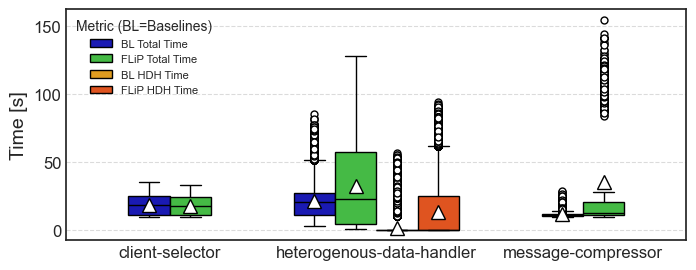

In [17]:
TIME_COL = 'Total Time of FL Round'
HDH_TIME_COL = 'HDH Time'

# --- 2. Prepare Tidy DataFrame (same as before) ---
all_data = []
all_data.append(
    pd.DataFrame(
        {'Time Value': exp_data_selector[TIME_COL], 'Pattern': 'client-selector', 'Measurement': 'BL Total Time'}))
all_data.append(pd.DataFrame(
    {'Time Value': exp_data_selector_flip[TIME_COL], 'Pattern': 'client-selector', 'Measurement': 'FLiP Total Time'}))
all_data.append(
    pd.DataFrame(
        {'Time Value': exp_data_hdh[TIME_COL], 'Pattern': 'heterogenous-data-handler', 'Measurement': 'BL Total Time'}))
all_data.append(
    pd.DataFrame({'Time Value': exp_data_hdh[HDH_TIME_COL], 'Pattern': 'heterogenous-data-handler',
                  'Measurement': 'BL HDH Time'}))
all_data.append(
    pd.DataFrame({'Time Value': exp_data_hdh_flip[TIME_COL], 'Pattern': 'heterogenous-data-handler',
                  'Measurement': 'FLiP Total Time'}))
all_data.append(
    pd.DataFrame({'Time Value': exp_data_hdh_flip[HDH_TIME_COL], 'Pattern': 'heterogenous-data-handler',
                  'Measurement': 'FLiP HDH Time'}))
all_data.append(pd.DataFrame(
    {'Time Value': exp_data_compressor[TIME_COL], 'Pattern': 'message-compressor', 'Measurement': 'BL Total Time'}))
all_data.append(pd.DataFrame(
    {'Time Value': exp_data_compressor_flip[TIME_COL], 'Pattern': 'message-compressor',
     'Measurement': 'FLiP Total Time'}))
combined_df = pd.concat(all_data, ignore_index=True)

hdh_total_time = \
    combined_df[
        (combined_df['Pattern'] == 'heterogenous-data-handler') & (combined_df['Measurement'] == 'BL Total Time')][
        'Time Value']
hdh_total_time_flip = combined_df[
    (combined_df['Pattern'] == 'heterogenous-data-handler') & (combined_df['Measurement'] == 'FLiP Total Time')][
    'Time Value']
percentage_increase = (hdh_total_time_flip.mean() - hdh_total_time.mean()) / hdh_total_time.mean() * 100
print(percentage_increase)

hdh_total_time = \
    combined_df[
        (combined_df['Pattern'] == 'heterogenous-data-handler') & (combined_df['Measurement'] == 'BL HDH Time')][
        'Time Value']
hdh_total_time_flip = combined_df[
    (combined_df['Pattern'] == 'heterogenous-data-handler') & (combined_df['Measurement'] == 'FLiP HDH Time')][
    'Time Value']
percentage_increase = (hdh_total_time_flip.mean() - hdh_total_time.mean()) / hdh_total_time.mean() * 100
print(percentage_increase)

# --- 3. Define Order and Colors ---
hue_order = ['BL Total Time', 'FLiP Total Time', 'BL HDH Time', 'FLiP HDH Time']
palette = {
    'BL Total Time': 'mediumblue',
    'FLiP Total Time': 'limegreen',
    'BL HDH Time': 'orange',
    'FLiP HDH Time': 'orangered'
}

# --- 4. Plotting with Manual Control ---
# Create the figure and axes first
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(8, 3))

# Filter data for the 2-box groups
df_1_box = combined_df[combined_df['Pattern'] == 'client-selector']
# Filter data for the 4-box group
df_2_box = combined_df[combined_df['Pattern'] == 'heterogenous-data-handler']
# Filter data for the 4-box group
df_3_box = combined_df[combined_df['Pattern'] == 'message-compressor']

# --- NEW: Define the plot style elements in a dictionary ---
# This makes it easy to apply a consistent style to all boxplots.
style_args = {
    'showmeans': True,  # This is crucial to display the mean marker
    'boxprops': {'edgecolor': 'black', 'linewidth': 1},
    'whiskerprops': {'color': 'black', 'linewidth': 1},
    'capprops': {'color': 'black', 'linewidth': 1},
    'medianprops': {'color': 'black', 'linewidth': 1},
    'flierprops': {'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black',
                   'markersize': 5, 'markeredgewidth': 1},
    'meanprops': {'marker': '^', 'markerfacecolor': 'white', 'markeredgecolor': 'black',
                  'markersize': 10, 'markeredgewidth': 1}
}

sns.set_style("white")

sns.boxplot(
    data=df_1_box,
    x='Pattern',
    y='Time Value',
    hue='Measurement',
    hue_order=['BL Total Time', 'FLiP Total Time'],  # Only use relevant hue order
    palette=palette,
    width=0.4,
    ax=ax,
    **style_args
)

sns.boxplot(
    data=df_2_box,
    x='Pattern',
    y='Time Value',
    hue='Measurement',
    hue_order=hue_order,  # Only use relevant hue order
    palette=palette,
    ax=ax,
    **style_args
)

sns.boxplot(
    data=df_3_box,
    x='Pattern',
    y='Time Value',
    hue='Measurement',
    hue_order=['BL Total Time', 'FLiP Total Time'],  # Use the full hue order here
    palette=palette,
    width=0.4,
    ax=ax,
    **style_args
)

# --- 5. Final Polishing ---
# Set the x-axis labels correctly
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Time [s]', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.tick_params(axis='both', which='major', labelsize=12)

# Handle the legend (it will have duplicates, so we fix it)
handles, labels = ax.get_legend_handles_labels()
# Use OrderedDict to preserve order and remove duplicates
unique_labels = OrderedDict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title='Metric (BL=Baselines)', fontsize=8)

plt.savefig('plots/rq3/rq3_time_boxplot_text.pdf', dpi=300, bbox_inches='tight')
plt.show()